<a href="https://colab.research.google.com/github/k1-furuya/rstan001/blob/main/%E9%9B%A2%E8%81%B7%E7%8E%87%E3%81%AE%E3%82%B3%E3%83%BC%E3%83%89%EF%BC%88%E6%80%9D%E8%80%83%E9%81%8E%E7%A8%8B%E5%90%AB%E3%82%80%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ポートフォリオでの思考過程も意識するため、無駄な分析、コードや、路線の変更も含まれており、綺麗なスクリプトではないことをご承知ください。**

In [ ]:
import pandas as pd

# ファイルの読み込み
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# 離職率の算出
attrition_counts = df['Attrition'].value_counts()
attrition_rate = attrition_counts['Yes'] / (attrition_counts['Yes'] + attrition_counts['No']) * 100

attrition_rate

16.122448979591837

2016年の日本のIT業界離職率は10%

厚生労働省 平成28年雇用動向調査結果の概要 https://www.mhlw.go.jp/toukei/itiran/roudou/koyou/doukou/17-2/index.html

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
# 欠損値の確認
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [ ]:
# 選択したカラムに絞って新しいデータセットを作成
selected_columns = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'JobSatisfaction',
                    'TotalWorkingYears', 'BusinessTravel', 'Department',
                    'EnvironmentSatisfaction', 'OverTime', 'Attrition']
df = df[selected_columns]

# カテゴリカル変数を数値に変換
filtered_data_numeric = pd.get_dummies(df, drop_first=True)

# 相関行列の計算
correlation_matrix = filtered_data_numeric.corr()

correlation_matrix

,Age,DistanceFromHome,MonthlyIncome,JobSatisfaction,TotalWorkingYears,EnvironmentSatisfaction,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,OverTime_Yes,Attrition_Yes
Age,1.000000,-0.001686,0.497855,-0.004892,0.680381,0.010146,-0.024743,0.028791,0.017883,-0.027549,0.028062,-0.159205
DistanceFromHome,-0.001686,1.000000,-0.017014,-0.003669,0.004628,-0.016075,0.005081,-0.020116,-0.008117,0.014085,0.025514,0.077924
MonthlyIncome,0.497855,-0.017014,1.000000,-0.007157,0.772893,-0.006259,-0.031658,0.038779,-0.064720,0.063978,0.006089,-0.159840
JobSatisfaction,-0.004892,-0.003669,-0.007157,1.000000,-0.020185,-0.006784,0.027117,-0.036562,-0.002798,0.013499,0.024539,-0.103481
TotalWorkingYears,0.680381,0.004628,0.772893,-0.020185,1.000000,-0.002693,-0.012177,0.030320,0.011087,-0.014781,0.012754,-0.171063
EnvironmentSatisfaction,0.010146,-0.016075,-0.006259,-0.006784,-0.002693,1.000000,-0.012624,0.008496,0.027976,-0.025606,0.070132,-0.103369
BusinessTravel_Travel_Frequently,-0.024743,0.005081,-0.031658,0.027117,-0.012177,-0.012624,1.000000,-0.753092,0.003340,-0.000160,0.029392,0.115143
BusinessTravel_Travel_Rarely,0.028791,-0.020116,0.038779,-0.036562,0.030320,0.008496,-0.753092,1.000000,0.000465,-0.004718,-0.000539,-0.049538
Department_Research & Development,0.017883,-0.008117,-0.064720,-0.002798,0.011087,0.027976,0.003340,0.000465,1.000000,-0.906818,-0.003036,-0.085293
Department_Sales,-0.027549,0.014085,0.063978,0.013499,-0.014781,-0.025606,-0.000160,-0.004718,-0.906818,1.000000,0.005864,0.080855


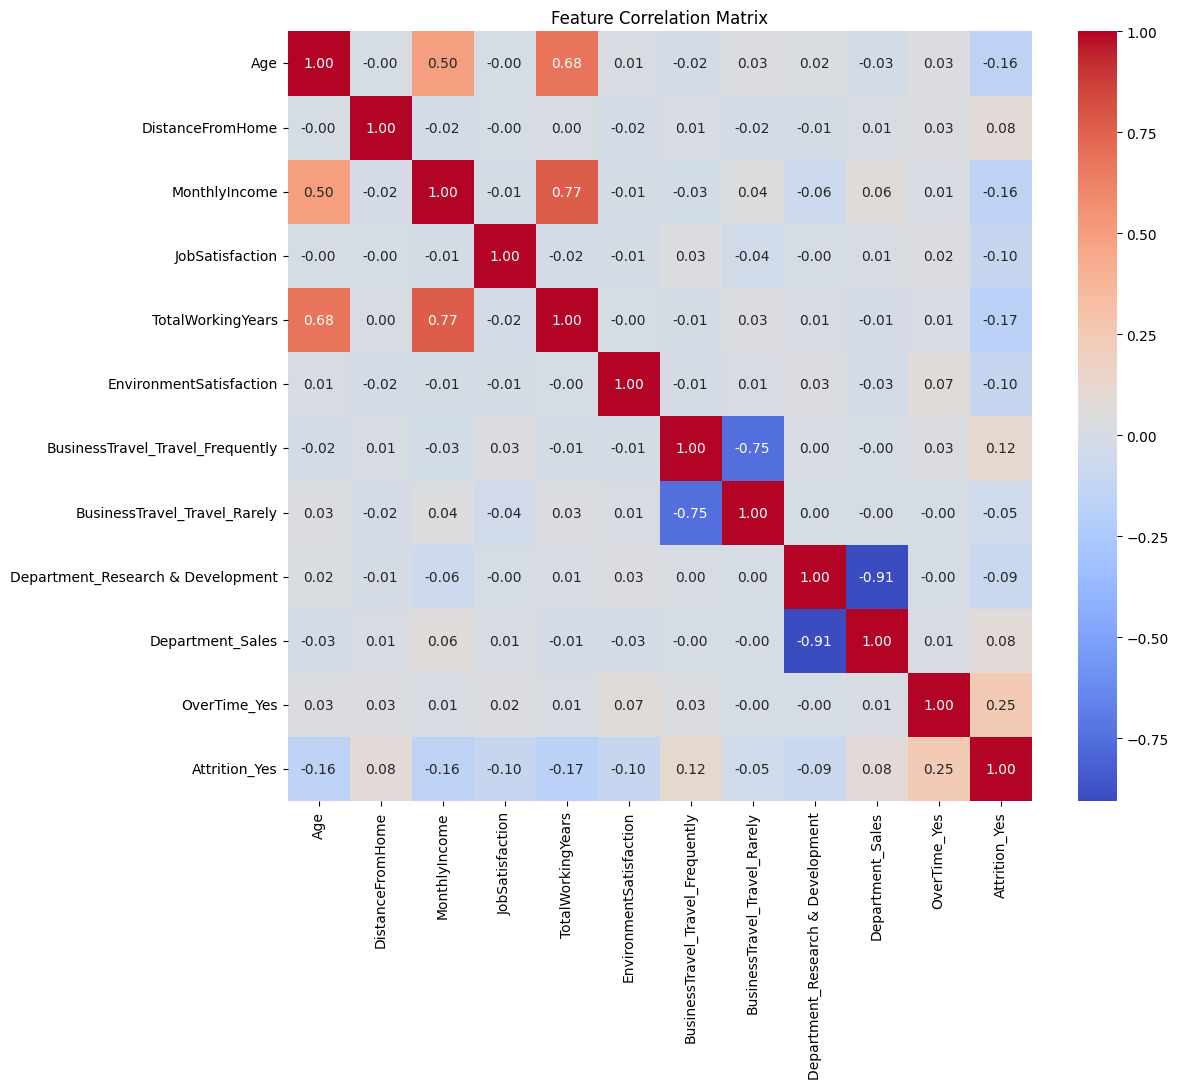

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 相関行列のヒートマップを作成
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

**まずはロジスティック回帰で重要度を視覚化してみる**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 目的変数（Attrition）と予測変数を分離
X = filtered_data_numeric.drop('Attrition_Yes', axis=1)
y = filtered_data_numeric['Attrition_Yes']

# 訓練セットとテストセットに分割（7:3）
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ロジスティック回帰モデルのインスタンス化と訓練
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# テストデータに対する予測
y_pred = log_reg.predict(X_test)

# 混合行列の表示
conf_matrix = confusion_matrix(y_test, y_pred)

display(conf_matrix)


array([[372,   8],
       [ 53,   8]])

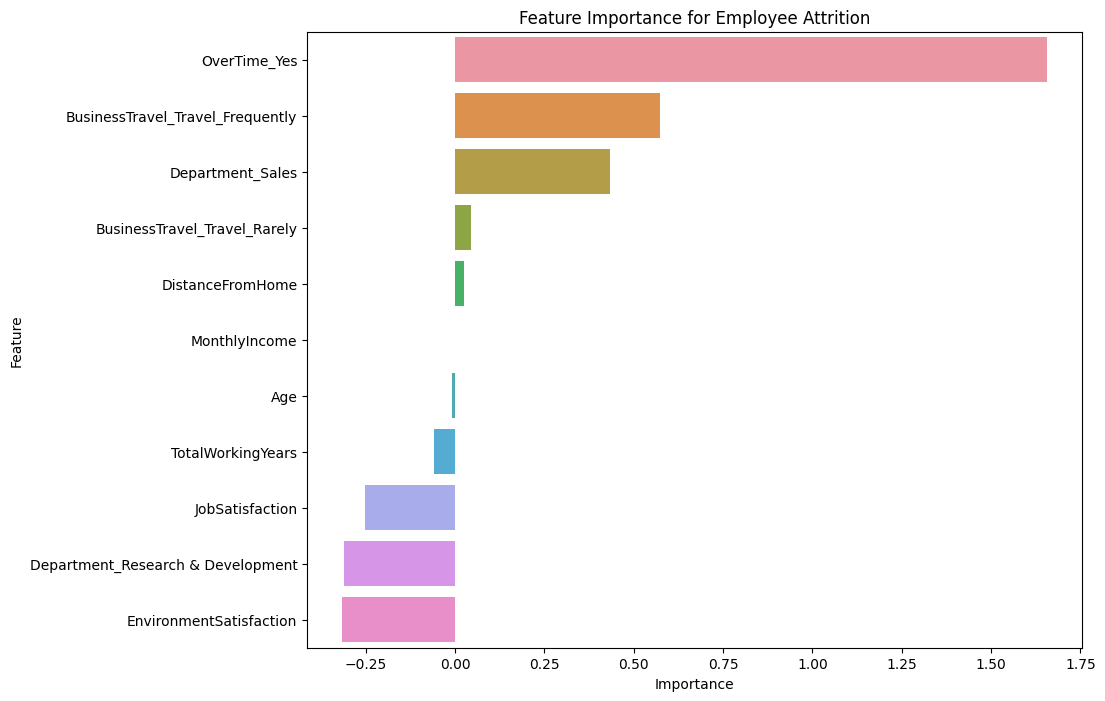

In [ ]:
# 特徴の重要度（ロジスティック回帰の係数）を取得
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': log_reg.coef_[0]
})

# 重要度に基づいて特徴をソート
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# 重要度の可視化
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Employee Attrition')
plt.show()


<Figure size 600x600 with 0 Axes>

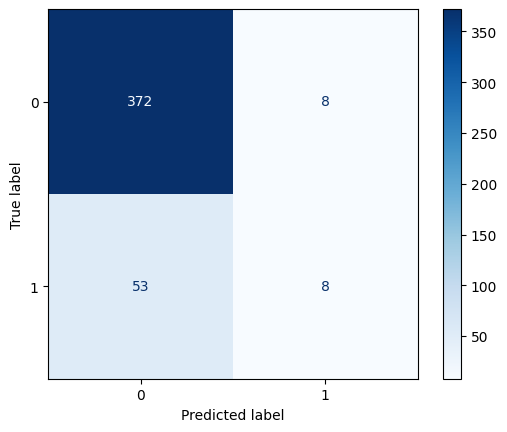

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# 混同行列の視覚化（ConfusionMatrixDisplay.from_predictionsを使用）
plt.figure(figsize=(6,6))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)
plt.show()


In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score

# 精度、正解率、再現率の計算
precision = precision_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)

### Recallが極端に低い。離職者のデータセットの少なさが原因と考えられる。



Precision: 0.5
Accuracy: 0.8616780045351474
Recall: 0.13114754098360656


In [ ]:
from sklearn.metrics import roc_auc_score

# テストデータに対するAUCスコアの計算
auc_score = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

auc_score


0.7618636755823986

**以下では、離職と重要度の高い項目を視覚化していく。**

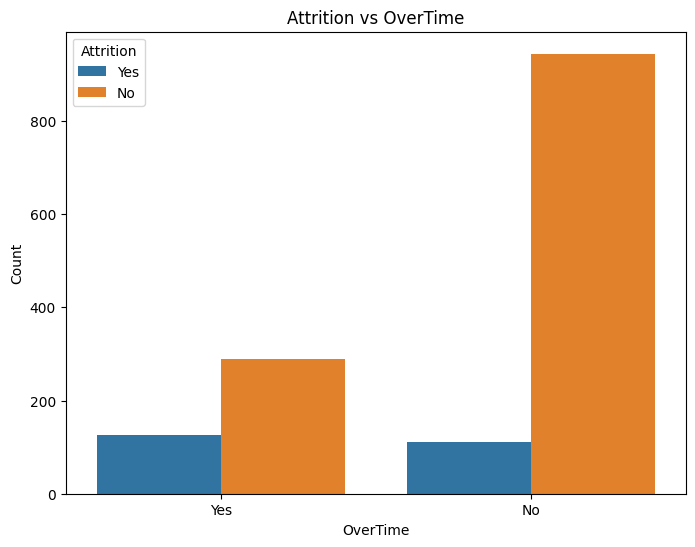

In [ ]:
# AttritionとOverTimeの関係を可視化
plt.figure(figsize=(8, 6))
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title('Attrition vs OverTime')
plt.xlabel('OverTime')
plt.ylabel('Count')
plt.show()

グラフからは、残業をする従業員の方が、しない従業員に比べて離職する割合が高いことが読み取れます。この洞察は、残業時間の管理や働き方の改善が離職率低下に役立つ可能性を示唆しています

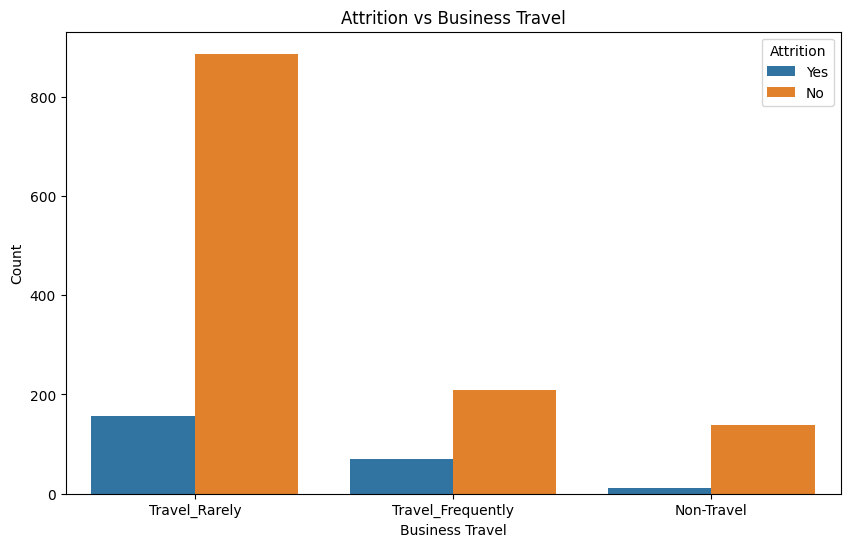

In [ ]:
# AttritionとBusinessTravelの関係を可視化
plt.figure(figsize=(10, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
plt.title('Attrition vs Business Travel')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.show()


グラフからは、出張頻度が高い従業員（「Travel_Frequently」）の中に、比較的高い離職率が見られることが分かります。出張の頻度が離職に与える影響を考慮することは、離職率を低減するための施策を立てる際に重要な要素となります

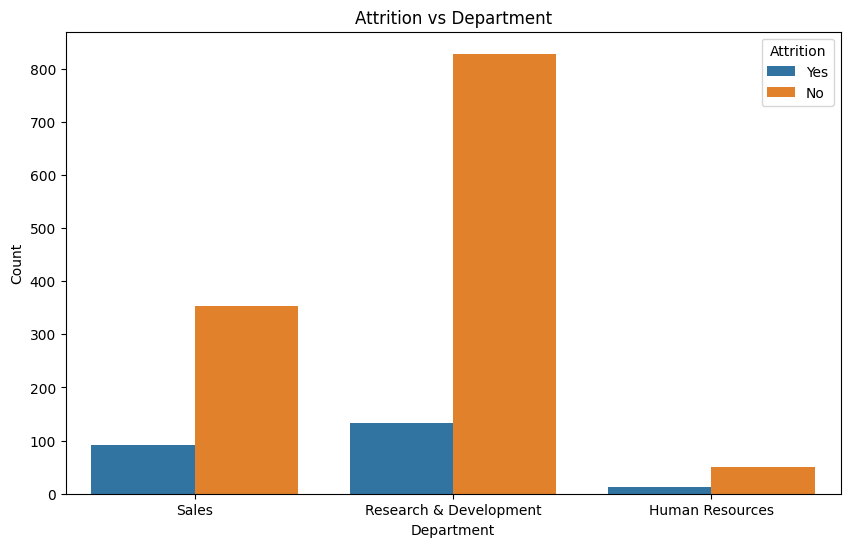

In [ ]:
# AttritionとDepartmentの関係を可視化
plt.figure(figsize=(10, 6))
sns.countplot(x='Department', hue='Attrition', data=df)
plt.title('Attrition vs Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()


このグラフからは、特に「Sales」（営業）と「Research & Development」（研究開発）の部署で離職率が高いことが分かります。これらの部署に特有の環境や仕事の性質が、離職に影響を与えている可能性があります。部署別の離職原因をより詳細に分析し、部署特有の改善策を立てることが効果的な対策になるでしょう。

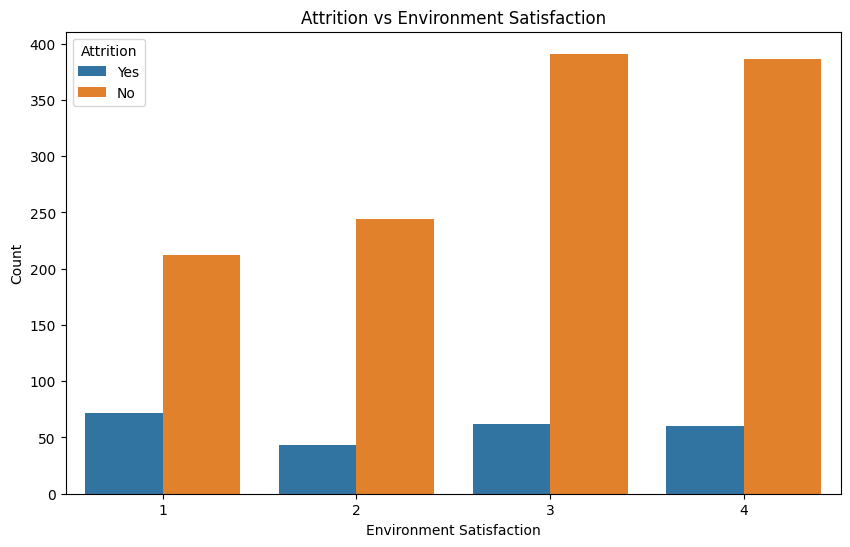

In [ ]:
# AttritionとEnvironmentSatisfactionの関係を可視化
plt.figure(figsize=(10, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.title('Attrition vs Environment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Count')
plt.show()


グラフからは、職場環境に対する満足度が低い（特にスコアが1の従業員）従業員の中に、離職率が高い傾向が見られます。職場環境の改善は、離職率を低減するための重要な要素となります。これには、職場の物理的環境の改善、チームのコミュニケーションの促進、従業員の声を反映した施策の実施などが含まれます。 ​

# **`ロジスティック回帰よりLightGBMの方が精度が高いと思い出したので、路線変更`**

In [ ]:
from sklearn.preprocessing import StandardScaler

# スケーラーのインスタンス化
scaler = StandardScaler()

# 訓練データセットを変換
X_train_scaled = scaler.fit_transform(X_train)

# テストデータセットも同様に変換
X_test_scaled = scaler.transform(X_test)


[LightGBM] [Info] Number of positive: 176, number of negative: 853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171040 -> initscore=-1.578276
[LightGBM] [Info] Start training from score -1.578276


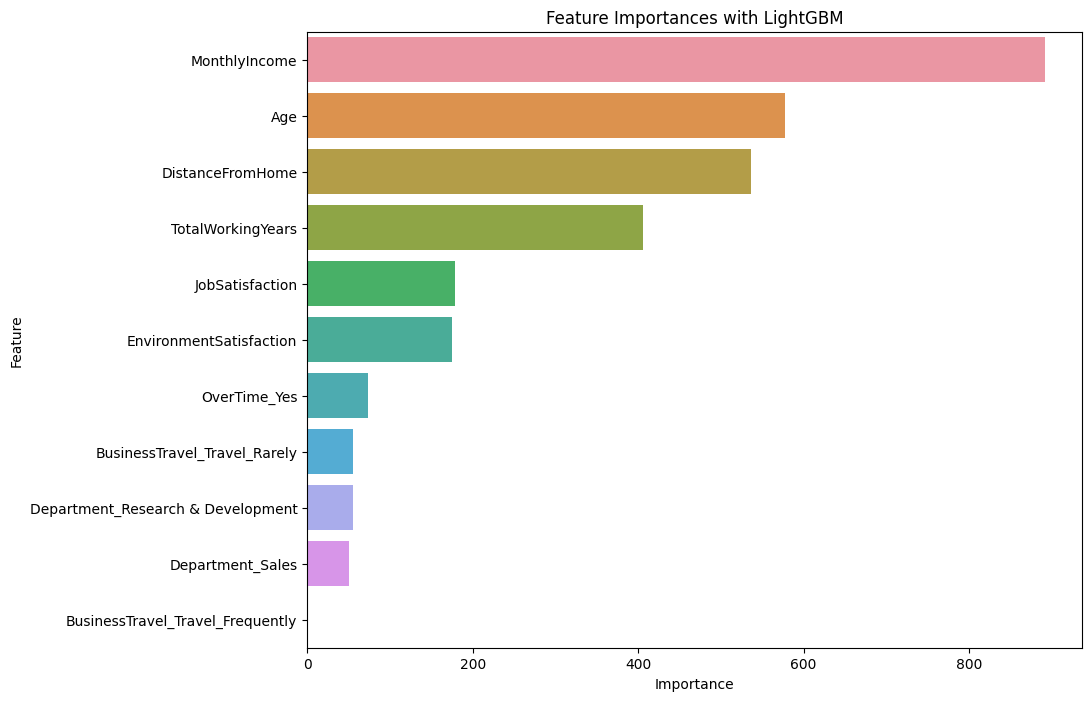

In [ ]:
from lightgbm import LGBMClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# データの準備（X_train_scaledとy_trainは既に準備されていると仮定）
# LightGBMモデルのインスタンス化
lgbm = LGBMClassifier()

# モデルの訓練
lgbm.fit(X_train_scaled, y_train)

# 特徴重要度の取得
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 特徴重要度の可視化
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances with LightGBM')
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

# モデルの訓練
lgbm = LGBMClassifier()
lgbm.fit(X_train_scaled, y_train)

# テストデータに対する予測確率の取得
y_pred_proba = lgbm.predict_proba(X_test_scaled)[:, 1]

# AUCスコアの計算
auc_score = roc_auc_score(y_test, y_pred_proba)

print('AUC Score:', auc_score)


[LightGBM] [Info] Number of positive: 176, number of negative: 853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 394
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171040 -> initscore=-1.578276
[LightGBM] [Info] Start training from score -1.578276
AUC Score: 0.7413718723037102


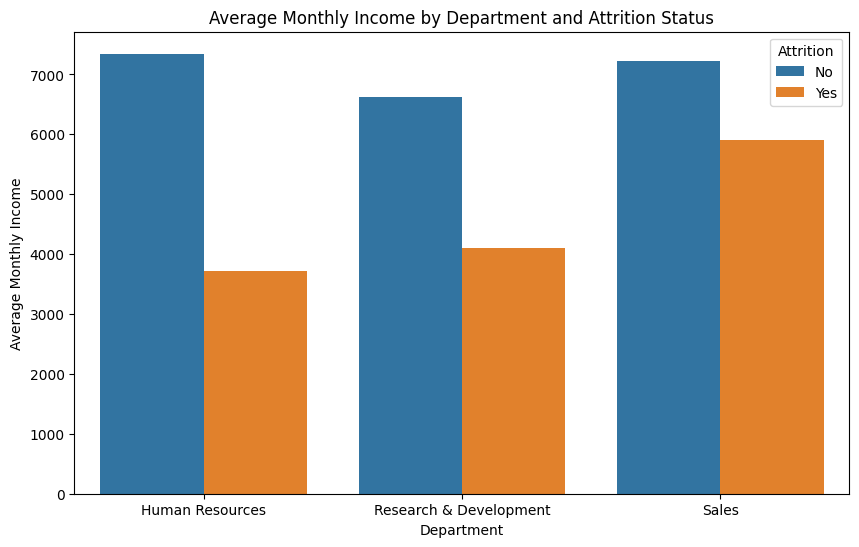

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 部門と離職の関係による月給の平均値を計算
department_attrition_salary = df.groupby(['Department', 'Attrition'])['MonthlyIncome'].mean().reset_index()

# 離職者と非離職者で分けて棒グラフを作成
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='MonthlyIncome', hue='Attrition', data=department_attrition_salary)
plt.title('Average Monthly Income by Department and Attrition Status')
plt.xlabel('Department')
plt.ylabel('Average Monthly Income')
plt.legend(title='Attrition')
plt.show()


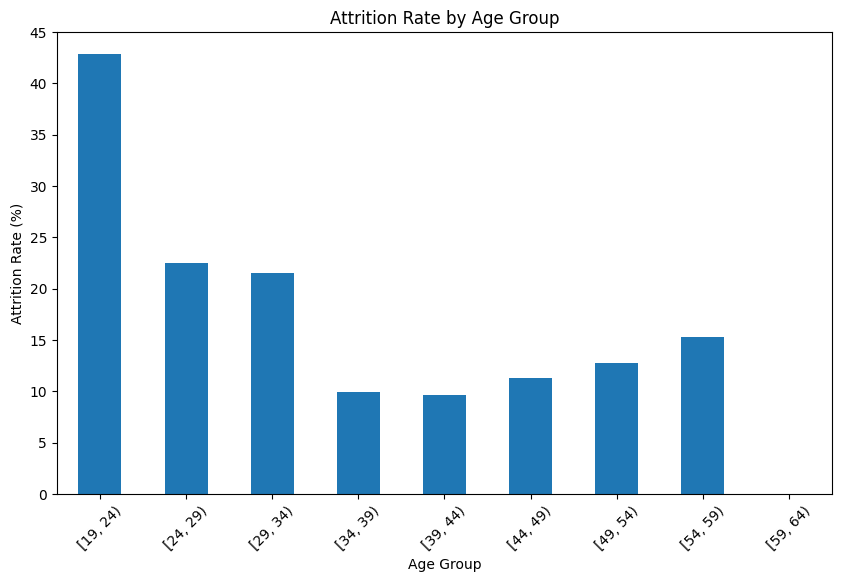

In [ ]:

# 年齢層を5歳ごとに区切るためのビンを作成
age_bins = list(range(19, 65, 5))
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, right=False)

# 年齢層別の離職率を計算
age_group_attrition = df.groupby('AgeGroup')['Attrition'].value_counts(normalize=True).unstack() * 100
age_group_attrition_yes = age_group_attrition['Yes']  # 'Yes'は離職したことを示す

# 棒グラフを作成
plt.figure(figsize=(10, 6))
age_group_attrition_yes.plot(kind='bar')
plt.title('Attrition Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)  # 年齢層のラベルを回転して見やすくする
plt.show()



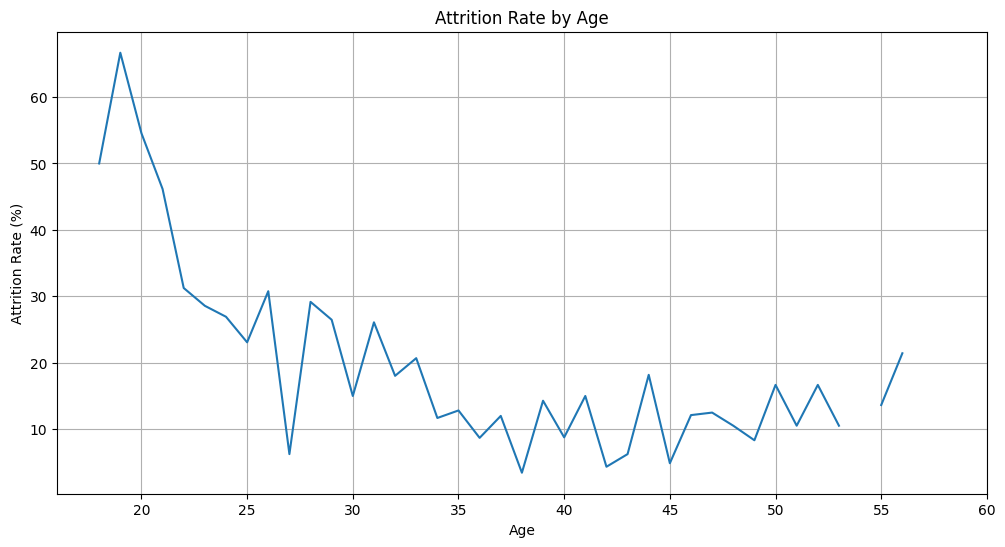

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1歳ごとの年齢層で離職率を計算
age_attrition = df.groupby('Age')['Attrition'].value_counts(normalize=True).unstack() * 100
age_attrition_yes = age_attrition['Yes']  # 'Yes'は離職したことを示す

# 折れ線グラフを作成
plt.figure(figsize=(12, 6))
age_attrition_yes.plot(kind='line')
plt.title('Attrition Rate by Age')
plt.xlabel('Age')
plt.ylabel('Attrition Rate (%)')
plt.grid(True)
plt.show()


In [ ]:
# 18歳から22歳のデータを抽出
df_18_22 = df[(df['Age'] >= 18) & (df['Age'] <= 22)]

# 18歳から22歳の平均離職率を計算
attrition_rate_18_22 = df_18_22['Attrition'].value_counts(normalize=True)['Yes'] * 100

print("18 to 22 years old attrition rate:", attrition_rate_18_22)


18 to 22 years old attrition rate: 47.368421052631575


<Figure size 1200x800 with 0 Axes>

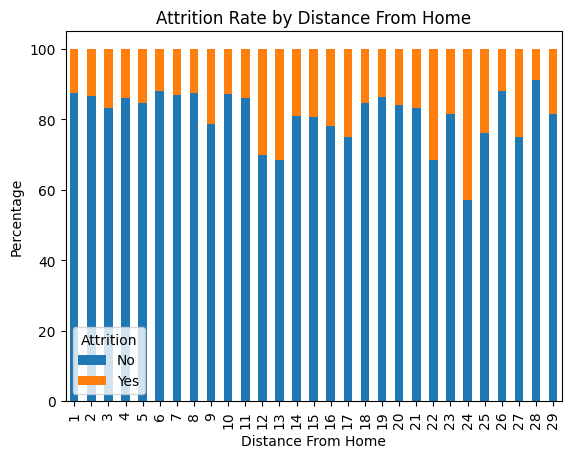

In [ ]:

# DistanceFromHomeごとのAttritionのYesとNoの比率を計算
distance_attrition_counts = df.groupby('DistanceFromHome')['Attrition'].value_counts(normalize=True).unstack() * 100

# 棒グラフで可視化
plt.figure(figsize=(12, 8))
distance_attrition_counts.plot(kind='bar', stacked=True)
plt.title('Attrition Rate by Distance From Home')
plt.xlabel('Distance From Home')
plt.ylabel('Percentage')
plt.legend(title='Attrition')
plt.show()


In [ ]:
# 現在の離職者数を計算
current_attrition_count = attrition_counts['Yes']

# 離職者の総数
total_employees = attrition_counts.sum()

# 離職率を6%減らしたときの離職者数の減少を計算
reduced_attrition_count = total_employees * 0.06

reduced_attrition_count


88.2

In [ ]:
#離職者を6%減らした時に防げる損失
1875000 * 88 / 10000

16500.0

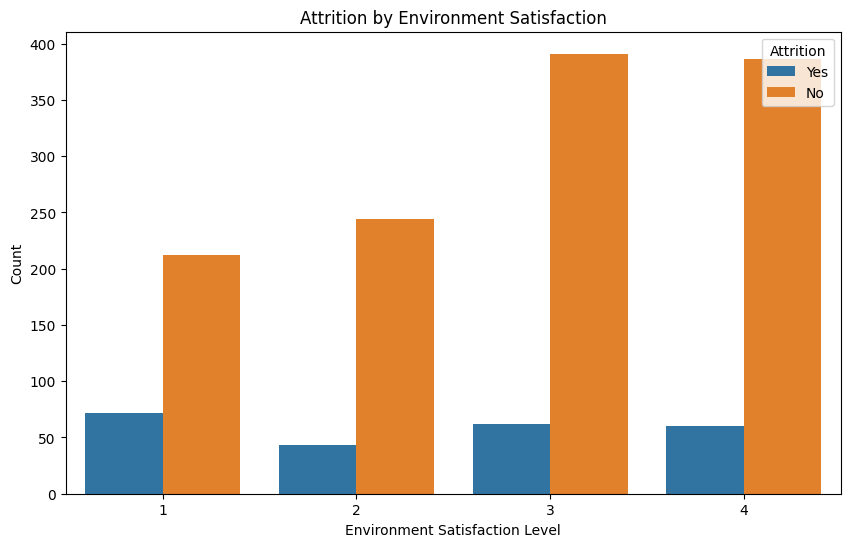

In [ ]:


# EnvironmentSatisfactionとAttritionの関係を可視化するための棒グラフを作成
plt.figure(figsize=(10, 6))
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
plt.title('Attrition by Environment Satisfaction')
plt.xlabel('Environment Satisfaction Level')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')
plt.show()
